# Pushing the Limit in Controlled Difficulty
## Finding the hardest settings the Killing Floor 2 economy allows
#### Joseph Rush

## 1. Introduction

Killing Floor 2 (KF2) is a team-based first-person shooter released in 2015. In the game, a team of players has to defeat successive waves of enemies, referred to as "Zeds." As time has gone on, players have found the game's hardest difficulty, Hell on Earth, not to be challenging enough and too random, and they have sought to find their own solutions through creating mods for the game. One of the solutions, and possibly the most popular, is Controlled Difficulty (CD), originally created by **Blackout** and since iterated on by other modders.

As the name suggests, Controlled Difficulty allows players to control the game's difficulty through a variety of factors, such as how often enemies are spawned, how many enemies can be on the map at one time, how the collision between enemies is treated, and more. One of the biggest ways difficulty is tweaked is by manipulating which enemies spawn in what order. This is known as creating a "spawn cycle," which is essentially a list of enemies that the game runs through in a set order.

The way that spawning works varies by a multitude of factors that introduce randomness into play--which gives CD its infinite replayability--but the essential point for this inquiry is that the number and types of enemies that will spawn can be known beforehand. Players are also rewarded with a set amount of money from defeating a given enemy. A "cyst" gives 7 dosh (unit of in-game currency) on kill, a "gorefast" gives 12, etc. Then, at the end of the round, the game provides bonus money to each player who is still alive based on how much money they earned during the round.

This means that the minimum income for the team can be known by looking at the enemies in a spawn cycle and the reward on kill for each enemy. From there, a designer can extrapolate to what weapons a team a team might buy, and therefore how much firepower the team will have access to on the next wave. There are more than a hundred weapons in Killing Floor 2 between the core game and the DLCs, so this inquiry will be limiting the list quite severely. There are also many perks (classes) available to players. I will be limiting these quite severely, as well. These are limits I need to put into place to keep the model under control.

**(This paragraph is game minutiae and can be skipped if you don't care about the fiddly intricacies of my modeling decisions.)** Things that would particularly break all but the most complicated models include the fact that the berserker perk, being based in melee weapons, has a theoretically infinite amoung of damage it can deal, and a firebug or SWAT, with their infinite ammunition in Zed Time (the slow motion that occurs periodically throughout the game), are a nightmare to calculate for.

Another known value is the head health of each enemy. The body of the enemy and the head are treated as two different areas for incoming damage. (The reality is more complicated than that, but that is everything one needs to know to understand the model, and I'm not taking any shortcuts that would effect accuracy in this regard.) I will specifically be examining headshots, as modeling body damage and perks focused on body damage is extremely complicated to the point of intractability, and could only be analyzed post facto from a large data set.

Similarly, if a designer knows roughly how accurate players are, they can tune even more precisely by knowing how many headshots a team will hit, and therefore how much damage a team can actually deal with a given amount of ammunition.

This model is a stepping-stone to answering interesting and complex questions about difficulty in the game. Being able to model per-wave damage and ammo expenditure is the first step to completing a full investigation of early game difficulty. In particular, this iteration seeks to examine the question of how difficult a recently produced cycle, mb_v0a, is. It's wave 1 is meant to be quite challenging, but if a team plays optimally, how much more room is there to increase difficulty without creating impossible conditions for play?

# 2. Assumptions
- **Precision meta team**: 1 commando, 2 gunslingers, 2 sharpshooters, as well as 1 medic. There are many possible combinations of perks, but I am choosing to examine the high level precision composition here, as it has an outsized impact on cycle design and popularity, since the majority of the player base uses this team composition. They are also the simplest to model.
- **Meta weapons loadouts**. Through collaboration with other players, I've come up with the following weapons for each perk:
 - 9mm, Dual 1858, SPX(+2), dual deagles, and single AF for gunslinger
 - 9mm, Winchester, EBR(+1), SPX(+2) for sharpshooter
 - 9mm, AR15, Bullpup, SCAR, FN FAL for commando
- **Unmodded weapons**. I will not be running the numbers for any of the variant weapon packs in use by different communities. Those are an inquiry that would be very interesting to examine in the future, but they are outside the scope of the current examination.
- **Damage Modeled according to certain skills**. Different perks have many different skills available to them, and there's a lot of choices available. I will be using some of the most common combinations, documented below.
 - **Always 5 REU**. There is an ability on sharpshooters and gunslingers called "Rack 'Em Up." It awards extra damage for hitting multiple headshots in a row, up to 5, and decays after 2 seconds of not hitting any headshots. I am choosing to always keep this at its highest value. It isn’t quite accurate to real play, particularly for players with lower accuracy or playing parts of the map where they don’t have a constant flow of enemies to shoot, but it’s close enough to reality for this model. A more complicated and thorough model could look at shots fired per wave and real wave durations and perhaps model REU based on how many 2 second intervals go by without any headshots expected to be hit 
- Sharpshooters use 4 freeze grenades each in every wave. This is very realistic to actual play in the early waves I am examining. If anything, they tend to use fewer. 
- **All players only fill their SPX to 80 rounds**. This prevents me from having to juggle individual weapon limits for different players.
- **All zeds are killed by players**. This ignores the ways that different zeds can cause friendly fire to one another, but there's no way outside of some insane and fraught data-crunching to begin to estimate how many zeds die to friendly fire, and there will be huge variance by map. In addition, I would not trust any such data, because getting usable statistics out of Killing Floor 2 is such a fraught activity. The base game simply isn't designed to gather all but the most basic stats in the first place, and there are limits to what can be done on the scripting side that the mods work with. In addition, not *that* many zeds die this way when you look at total zeds spawned vs. total zeds killed by players, so I feel safe disregarding it here.
- **Medics**: Earn money basically equivalent to the values I have available from the tournament. Their income tends not to vary as heavily as other perks since they make their money off healing their allies, not off the enemy.
- **No one dies**. Interestingly, the team only loses assist money from joint takedowns in the case of a player dying--the wave end bonus doesn't change. That said, players dying is messy and would add complexity to the model that doesn't need to be there.

### Note: Perk skill notation

Each perk has a 10 skill choices, arranged into 5 tiers of 2 choices. The choices are mutually exclusive. A common notation for this is to say which side, left or right, the player is choosing, resulting in notation like RLLLR. This indicate the right side skill for the first tier, the left side skill for the second tier, and so on. It would be a waste of space to ennumerate every skill here, so I'm refraining from doing so. The following only notes the skills that affect the calculations in this analysis.

#### Commando Skill & Weapons
- Class damage bonus
 - +25% perk weapon damage
- Skills are RLLLR until they buy their SCAR. The following skills affect damage:
 - Fallback: Increase damage with your 9mm pistol/HRG 93R and knife 85%; increase weapon switching speed 50%.
 - Hollow Point Rounds: Increase damage of perk weapons 30%
- RLLRR after they buy their SCAR. The following skills affect damage:
 - Fallback: Increase damage with your 9mm pistol/HRG 93R and knife 85%, and increase weapon switching speed 50%.
 
1. AR15 & 9mm
2. Bullpup, AR15, & 9mm
3. SCAR, Bullpup, & 9mm
4. SCAR, FN FAL, & 9mm
5. Add Spare SCAR
6. Add Spare FAL
7. Add 9mm upgrade(s)
8. Add spare FAL
 
#### Gunslinger Skills & Weapons
- Class damage bonus
 - +25% perk weapon damage
- RLRLR skills for all waves. The following skill affects damage:
 - Rack ‘em Up: Consecutive headshots with perk weapons increases damage 10%, to a maximum of 50%
 
1. 1858s & 9mm
2. SPX, 1858s (rebought), & 9mm
3. Dual deags, SPX, 1858s (rebought), & 9mm
4. Dual deags, SPX+2, & 9mm
5. Add spare deag
6. Add single AF
7. Add spare deag
8. Add spare SPX+2
 
#### Sharpshooter Skills and Weapons
- Class base
 - +25% headshot damage
- RLLRR skills for all waves. The following skills affect damage:
 - Stability: +30% damage
 - Rack ‘em Up: Consecutive headshots with perk weapons increases damage 10%, to a maximum of 50%

1. Winchester & 9mm
2. EBR, Winchester, & 9mm; 6 freezes
3. EBR, EBR, Winchester, & 9mm; 6 freezes
4. EBR+1, EBR+1, Winchester, & 9mm; 6 freezes
5. SPX+2, EBR+1, EBR+1, 9mm; 6 freezes
6. Add EBR+1
7. Add SPX+2
8. Add EBR+1

## 3. Tradeoffs:

Killing Floor 2 is a ridiculously complicated game under the hood, produced by dozens or hundreds of developers across multiple years. As mentioned above, I have to impose reasonable limits on this model to control complexity and scope creep as well as work within my programming abilities. For these reasons, the following represent places where more detail is possible, but I'm not going down the rabbit hole.
1.	**Headshot damage only**. It is often reasonable to kill the weak enemies in-game with body shots. Hit zone data does exist for zed kills via the extensive data-tracking on Tamari's servers, but it does not account for prior shots or, in the case of larges, for decapitations before the body was killed. A fleshpound cannot be assumed to have been killed with body shots when it was actually decapitated first and then shot in the chest for the quadruple damage multiplier on its decapitated body that is commonly used in play. Additionally, precision play emphasizes headshots, as they are most effective, and for the sake of not expanding the model into intractably unknowable territory, only headshots will be applied to zeds.
2.	**I am ignoring overkill and penetration damage**. This is perhaps the most distorting tradeoff. Overkill damage is when, for instance, a zed with 20 head HP is hit by a gun that does 130 damage, causing 110 damage to disappear into the void. Penetration damage is when certain weapons are able to fire through multiple enemies, which effectively adds damage from the void. They probably do not equal one another in practical play, and it would be possible for a better programmer than I to be modeling every kill by individual bullets and breakpoints, but that's an enormously complicated algorithm to even create, much less debug. If that's within your programming capabilities and you're reading this, hit me up.
3. **The impact of weapon penetration on accuracy values is ignored**. When your weapon goes through two zeds, it counts as two hits for only one shot fired. This is an inevitable and impossible to calculate part of play in the game, and I am choosing to ignore its impact. I consider it to be helping to offset the way I am disregarding overkill, as noted above.
4.	**Zed damage resistance is weighted by the raw statistic**. Weighting for zed damage resistances would be best derived from actual wave by wave kills per perk per cycle, but that’s beyond the scope of the easily accessible data.
5.	**The model does not currently account for target prioritization**. Without diverting too far into the nit and grit of play, some weapons and perks are better off spending their time shooting some enemies than others. An even more accurate model would weight damage distributions accordingly, but that is another significant addition in complexity.
6.	**My ability to account for shared money is limited**. In the game, if you do even one point of damage to an enemy you get its full dosh reward when it dies, because there's no good way to determine how significant your contribution was. What accounting I do have for this is rough guesstimation based on experience, rather than anything solid.
7.	**Grenade damage for commando & gunslinger is not included in the model**. The way the game models grenades is complicated. There's falloff by distance, projectiles, etc. I assume that grenades are used for the purposes of spending the model players' money, but they're not being applied as damage.
8.	**The Dead-Eye skill is ignored for sharpshooter**. This skill adds damage when a sharpshooter aims down sights (uses their scope/iron sights.) Its impact is unreliable and usually extremely minimal, since it depends on individual playstyles, maps, and situations, so I'm ignoring it entirely.
9.	**The assumption that all zeds are killed by players is somewhat inaccurate to real games**. This was addressed above under "all zeds are killed by players," but bears repeating here.
10. **Medic buffs are disregarded**. Medics can cause players to deal additional damage, up to 20% per shot. The in-game usage of this is incredibly complicated and varies from medic to medic and weapon to weapon, even day to day and wave to wave by factors like how much caffeine the player had or how much sleep they got the night before. There are no good stats available on buffs applied by medics and no way to acquire them outside of scraping hundreds or thousands of hours of recorded game footage on YouTube and noting hundreds upon hundreds of timestamps per game then modeling games individually over time played instead of just by wave, so I am simply regarding this as another factor working against damage lost to overkill and calling it a day. I do, eventually, want to see the sun again.
11. **Tournament accuracy data is not perfectly comparable to general play**. The ruleset in the tournament encouraged playing maps in strange, difficult places for speed, rather than staying in more traditional and safer locations where targets are easier to hit. This means that accuracy in the tournament dataset tends to be lower than what is seen in Tamari's community during more standard play.

## 4. The Data

This data was gathered from two primary places:
1. The data from Tamari's recent community tournament
2. The spreadsheet maintained by a currently active EU static team that plays Nightcore zeds.
A quick divergence to import necessary libraries:

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#### 4a. Gunslinger & Sharpshooter Accuracy & Headshot Accuracy
These values have been cleaned for data-distortions from AF2011s (a weapon that counts as one shot fired but 2 shots hit, which massively inflates accuracy statistics) by simply discarding any player who did a significant amount of damage with that weapon (above about 40,000 points of damage.) A notable exception to this is the data from the EU group, whose server uses a calculation to deal with the distortion from AFs that has proven quite reliable in practice, so I feel comfortable just taking their statistics at face value.

Additionally, the damage dealt by the player, the team's overall damage, and the % of the team damage dealt by that player (for use in weighting certain calculations down the line) are included in this table.

The first column, ACC, indicates the percentage of shots fired that impacted a zed.

The second column, HSACC (hits), indicates the percentage of shots that *both* hit a zed and were headshots.

The third column, HSACC (shots), is a derived statistic from multiplying the other two. It shows the percentage of shots fired that were headshots. For a semi-automatic gun, this is your percentage of clicks that hit a zed in the head.

In [6]:
# Two-dimensional table, no nested layers. 
# 2 example rows displayed of the 184 in the dataset.


dps_acc = pd.read_csv('E:\College\FinalProjectData\GS&SS_acc.csv')
dps_acc_df = pd.DataFrame(data=dps_acc)
dps_acc_df.head(2)

,ACC,HSACC (Hits),HSACC (Shots),DD,Team DD,% of DD
0,68.790538,49.639490,34.147272,365402,1449721,0.252050
1,67.096135,37.444609,25.123885,300911,1449721,0.207565


#### 4b. Commando Accuracy & Headshot Accuracy
Accuracy and headshot accuracy values for commando players. Drawn from the recent tournament hosted by Tamari as well as the closed EU group. No cleaning was required for this data.

Commando accuracy is treated separately because their weapons and playstyle differ significantly. They use automatic weapons rather than semi-automatic, meaning that they miss more, and during certain play situations it is more advantageous for them to fire many shots to secure the kill than to be stingy with their ammunition. So, their statistics trend much lower than sharpshooters or gunslingers.

In [7]:
# Two-dimensional table, no nested layers. 
# 2 example rows displayed of the 61 in the dataset.

mando_acc = pd.read_csv('E:\College\FinalProjectData\mando_acc.csv')
mando_acc_df = pd.DataFrame(data=mando_acc)
mando_acc_df.head(2)

,ACC,HSACC (Hits),HSACC (Shots),DD,Team DD,% of DD
0,57.98684,33.196523,19.249615,282885,1449721,0.195131
1,64.20765,37.624113,24.157559,267287,1223218,0.218511


#### 4c. Zed Populations
For a given cycle, how many of each enemy type are spawned in a given wave. In particular, I will be using my mb_v0a cycle that is currently under development, as it seeks to explore the exact question of how far the economy can be pushed before the team breaks. On these tables, row 0 is wave 1, row 1 is wave 2, and so on. These are *not* the order the enemies spawn in, just the number of them who have existed by the end of the wave.

In [8]:
# Two-dimensional tables, no nested layers. 
# Gathered by analyzing the text files loaded into the Controlled Difficulty Mod. 
# I used Tamari's SpawnCycler program for that analysis. 
# 2 example rows displayed.

bl2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-bl_v2.csv')
nt2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-nt_v2.csv')
osffi1_spawns = pd.read_csv('E:\College\FinalProjectData\populations-osffi_v1.csv')
apm2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-apm_v2.csv')
mig2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-ts_mig_v2.csv')
doom2pr_spawns = pd.read_csv('E:\College\FinalProjectData\populations-doom_v2_plus_rmk.csv')
mig3_spawns = pd.read_csv('E:\College\FinalProjectData\populations-ts_mig_v3.csv')
mb0a_spawns = pd.read_csv('E:\College\FinalProjectData\populations-mb_v0a.csv')
nvm1_spawns = pd.read_csv('E:\College\FinalProjectData\populations-nvm_v1.csv')
nvm1_df = mb0a_df = pd.DataFrame(data=nvm1_spawns)
mb0a_df = pd.DataFrame(data=mb0a_spawns)
mb0a_df.head(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,26,26,26,20,28,20,28,26,14,10,14,4,0,2
1,22,24,24,14,32,24,30,28,16,14,16,16,0,14


#### 4d. Zed Stats
Head health, headshot multiplier, & damage resistances (handgun, rifle, & assault rifle) for each zed type.

This table itself isn't actually used, instead values are derived from it are placed in related dataframes, but it's here for reader reference.

In [9]:
# Two-dimensional tables, no nested layers, 
# Gathered from SimpleCat's KF2 Stats Spreadsheet

zedstats = pd.read_csv('E:\College\FinalProjectData\ZedStats.csv')
zedstats_df_display = pd.DataFrame(data=zedstats)
zedstats_df_display

,Category,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,Head Health,20.000000,20.000000,20.000000,125.000000,50.000000,150.000000,20.000000,20.00000,82.000000,220.000000,155.000000,1584.000000,1228.000000,1716.000000
1,Headshot Multiplier,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.10000,1.000100,1.001000,1.100000,1.100000,1.100000,1.100000
2,Adjusted Head Health,18.180000,18.180000,18.180000,113.640000,45.450000,136.360000,18.180000,18.18000,81.990000,219.780000,140.910000,1440.000000,1116.360000,1560.000000
3,Dosh reward,7.000000,7.000000,7.000000,7.000000,12.000000,12.000000,10.000000,15.00000,17.000000,17.000000,25.000000,75.000000,75.000000,200.000000
4,Dosh HP,100.000000,100.000000,100.000000,300.000000,200.000000,200.000000,55.000000,75.00000,257.000000,600.000000,230.000000,3569.000000,1724.000000,4608.000000
5,Dosh Step1,8.153600,8.153600,8.153600,8.153600,13.977600,13.977600,11.648000,17.47200,19.801600,19.801600,29.120000,87.360000,87.360000,232.960000
6,Dosh Step2,0.081536,0.081536,0.081536,0.027179,0.069888,0.069888,0.211782,0.23296,0.077049,0.033003,0.126609,0.024477,0.050673,0.050556
7,Dosh Step3,8.000000,8.000000,8.000000,8.000000,14.000000,14.000000,12.000000,17.00000,20.000000,20.000000,29.000000,87.000000,87.000000,233.000000


In [10]:
# This creates a version of the dataframe that is easier to feed into calculations;
# The "Category" column messes up the way dataframes interact.
zedstats_df_clean = zedstats_df_display.loc[:,'Cyst':]
zedstats_df_clean.head(1)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,20.0,20.0,20.0,125.0,50.0,150.0,20.0,20.0,82.0,220.0,155.0,1584.0,1228.0,1716.0


#### 4e. Weapon Data
Cost for initial purchase, rounds received with initial purpose, cost per magazine, cost per bullet, base damage per bullet, and damage per bullet after per bonuses are applied, noted at Total Damage. 

Upgraded weapons are included as a line entry with no initial bullets that costs the price of the upgrade.

The HPR beside the the AR15 and bullpup entries indicate that those values are for when the commando is using Hollow Point Rounds, which boost weapon damage.

In [11]:
# Two-dimensional tables, no nested layers
# Gathered from in-game UI and SimpleCat's KF2 Stats Spreadsheet

weapons_data = pd.read_csv('E:\College\FinalProjectData\WeaponStats.csv')
weapons_df = pd.DataFrame(data=weapons_data)

weapons_df.head(2)

,Weapon,Purchase cost,Purchase ammo,Cost per magazine,Bullets per magazine,Max Ammo (mag+spare),Cost per bullet,1. Base damage,Total Damage,Damage Type
0,9mm (mando),0,90,12.0,15,90,0.8,25,47,Handgun_9mm
1,AR15 HPR,200,120,20.0,20,308,1.0,30,47,AssaultRifle_AR15


In [12]:
weapons_df.columns = weapons_df.columns.str.strip()
weapons_df.set_index('Weapon', inplace=True)

In [13]:
weapons_df.head(2)

,Purchase cost,Purchase ammo,Cost per magazine,Bullets per magazine,Max Ammo (mag+spare),Cost per bullet,1. Base damage,Total Damage,Damage Type
Weapon,,,,,,,,,
9mm (mando),0,90,12.0,15,90,0.8,25,47,Handgun_9mm
AR15 HPR,200,120,20.0,20,308,1.0,30,47,AssaultRifle_AR15


In [14]:
weapons_resists = pd.read_csv('E:\College\FinalProjectData\WeaponResists.csv')
weapons_resist_df = pd.DataFrame(data=weapons_resists)

weapons_resist_df.head(2)

,Weapon,9mm (mando),AR15 HPR,Bullpup HPR,Bullpup,SCAR,FN FAL,9mm (sharp),Winchester,EBR,EBR+1,SPX (sharp),SPX+1 (sharp),SPX+2 (sharp),9mm (slinger),SPX (slinger),SPX+1 (slinger),SPX+2 (slinger),1858 (single),Deagle (single)
0,Cyst,1.01,1.5,1.5,1.5,1.5,1.0,1.01,1.0,1.0,1.0,1.0,1.0,1.0,1.01,1.0,1.0,1.0,1.01,1.01
1,Alpha Clot,1.01,1.0,1.0,1.0,1.0,1.0,1.01,1.0,1.0,1.0,1.0,1.0,1.0,1.01,1.0,1.0,1.0,1.01,1.01


In [15]:
weapons_resist_df.columns = weapons_resist_df.columns.str.strip()
weapons_resist_df.set_index('Weapon', inplace=True)

In [16]:
weapons_resist_df.head(2)

,9mm (mando),AR15 HPR,Bullpup HPR,Bullpup,SCAR,FN FAL,9mm (sharp),Winchester,EBR,EBR+1,SPX (sharp),SPX+1 (sharp),SPX+2 (sharp),9mm (slinger),SPX (slinger),SPX+1 (slinger),SPX+2 (slinger),1858 (single),Deagle (single)
Weapon,,,,,,,,,,,,,,,,,,,
Cyst,1.01,1.5,1.5,1.5,1.5,1.0,1.01,1.0,1.0,1.0,1.0,1.0,1.0,1.01,1.0,1.0,1.0,1.01,1.01
Alpha Clot,1.01,1.0,1.0,1.0,1.0,1.0,1.01,1.0,1.0,1.0,1.0,1.0,1.0,1.01,1.0,1.0,1.0,1.01,1.01


In [17]:
weapons_zedDmg = pd.read_csv('E:\College\FinalProjectData\WeaponZedDmg.csv')
weapons_zedDmg_df = pd.DataFrame(data=weapons_zedDmg)

weapons_zedDmg_df.head(2)

,Enemy Type,9mm (mando),AR15 HPR,Bullpup HPR,Bullpup,SCAR,FN FAL,9mm (sharp),Winchester,EBR,EBR+1,SPX (sharp),SPX+1 (sharp),SPX+2 (sharp),9mm (slinger),SPX (slinger),SPX+1 (slinger),SPX+2 (slinger),1858,Deagle
0,Cyst dmg,47.47,70.5,75.0,60.0,103.5,88.0,52.52,164.0,164.0,189.0,339.0,388.0,439.0,44.44,289.0,331.0,375.0,88.88,161.6
1,Alpha Clot dmg,47.47,47.0,50.0,40.0,69.0,88.0,52.52,164.0,164.0,189.0,339.0,388.0,439.0,44.44,289.0,331.0,375.0,88.88,161.6


In [18]:
weapons_zedDmg_df.columns = weapons_zedDmg_df.columns.str.strip()
weapons_zedDmg_df.set_index('Enemy Type', inplace=True)

In [19]:
weapons_zedDmg_df.head(2)

,9mm (mando),AR15 HPR,Bullpup HPR,Bullpup,SCAR,FN FAL,9mm (sharp),Winchester,EBR,EBR+1,SPX (sharp),SPX+1 (sharp),SPX+2 (sharp),9mm (slinger),SPX (slinger),SPX+1 (slinger),SPX+2 (slinger),1858,Deagle
Enemy Type,,,,,,,,,,,,,,,,,,,
Cyst dmg,47.47,70.5,75.0,60.0,103.5,88.0,52.52,164.0,164.0,189.0,339.0,388.0,439.0,44.44,289.0,331.0,375.0,88.88,161.6
Alpha Clot dmg,47.47,47.0,50.0,40.0,69.0,88.0,52.52,164.0,164.0,189.0,339.0,388.0,439.0,44.44,289.0,331.0,375.0,88.88,161.6


#### 4f. Medic Economy

Medics are an important part of team economy. The imported CSV is per wave data gathered from the 17 times a medic was employed during Tamari's community tournament. Row 0 is the average earnings, and therefore the value we're concerned with.

In [20]:
# Two-dimensional tables, no nested layers
# Gathered from Tamari tournament data

med_eco = pd.read_csv('E:\College\FinalProjectData\MedDosh_5wave.csv')
med_eco_df = pd.DataFrame(data=med_eco)
med_eco_df.head(1)

,Wave 1,Wave 2,Wave 3,Wave 4,Wave 5
0,459,635,1034,1047,1108


## 5. The Damage Formula of Killing Floor 2

In Killing Floor 2, damage is modeled with a pretty complicated formula that has up to 13 steps.
The full documentation starts in row 561 of Simple Cat's excellent Killing Floor 2 Statistics spreadsheet. https://docs.google.com/spreadsheets/d/1GDpg2mN1l_86U_RaDug0glFx8cZCuErwxZLiBKl9SyY/htmlview


The long and the short of it for my purposes here is that it results in the Calculated Damage column in section **4e**, above, when after 1-6 are applied.

Step 7 of the formula, which is hitzone damage, is dealt with in the zed statistic of "Adjusted Head Health" in section **4d**, above. 

Step 8, which is the damage weaknesses and resistances of each zed, is dealt with during the analysis below. 

Steps 9-13 aren't relevant when you're modeling pure headshot decapitations.

## 6. The Wave 1 Analysis

First, we need to figure out what players we are looking at. There are a lot of possible player skill levels a designer could want to tune to. They might want to design something for intermediate players, or a mix of beginner, intermediate, and advanced players. They might want to design specifically for advanced or elite players. 

#### 6a. Sharpshooters & gunslingers

The following box plot shows the distribution of headshot accuracy values for **sharpshooters and gunslingers** in section **4a**. Specifically, these are the percentages of total shots fired that impacted a zed in the head, (HSACC (Shots)).

([<matplotlib.axis.XTick at 0x294b1242a60>], [Text(1, 0, 'HSACC (Shots)')])

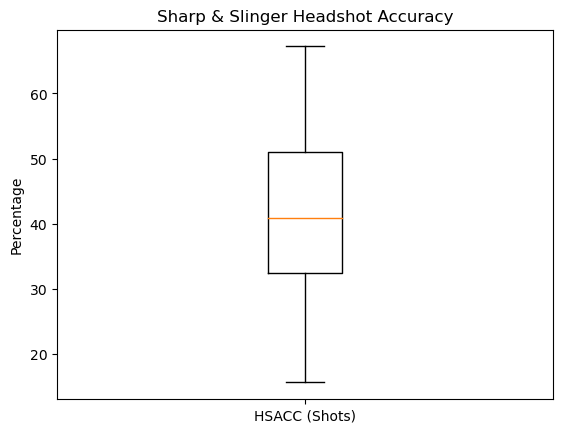

In [21]:
fig1, ax1 = plt.subplots()
# ax1.scatter(x=dps_acc_df['ACC'],y=dps_acc_df['HSACC (Hits)'])
# dps_acc_plot = ax1.boxplot(x=dps_acc_df['ACC'], positions = [1])
# dps_hsacc_plot = ax1.boxplot(x=dps_acc_df['HSACC (Shots)'], positions = [2])
dps_hsacc_plot = ax1.boxplot(x=dps_acc_df['HSACC (Shots)'], positions = [1
                                                                        ])
ax1.set_title('Sharp & Slinger Headshot Accuracy')
ax1.set_ylabel('Percentage')

plt.xticks([1], ['HSACC (Shots)'])

In [22]:
print("Headshot Accuracy Plot Statistics:")
print(f"  Lower Quartile (Q1): {dps_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Median (Q2): {dps_hsacc_plot['medians'][0].get_ydata()[1]}")
print(f"  Upper Quartile (Q3): {dps_hsacc_plot['boxes'][0].get_ydata()[3]}")
print(f"  Interquartile Range (IQR): {dps_hsacc_plot['boxes'][0].get_ydata()[3] - dps_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Lower Whisker: {dps_hsacc_plot['whiskers'][0].get_ydata()[1]}")
print(f"  Upper Whisker: {dps_hsacc_plot['whiskers'][1].get_ydata()[1]}")
print(f"  Outliers: {dps_hsacc_plot['fliers'][0].get_ydata()}")
print("")

dps_hsacc = dps_hsacc_plot['boxes'][0].get_ydata()[3]/100

Headshot Accuracy Plot Statistics:
  Lower Quartile (Q1): 32.426879167500005
  Median (Q2): 40.798135599999995
  Upper Quartile (Q3): 51.025
  Interquartile Range (IQR): 18.598120832499994
  Lower Whisker: 15.6274357
  Upper Whisker: 67.2
  Outliers: []



For now, I am choosing a value on the high end from this data set. I intend to return to this question with mixed sets of different players when modeling for different difficulties in the future, but for now I'm most interested in how far difficulty can be pushed for high level play. 

So, I will use the upper quartile values. This means that I am assuming **51.025%** of total shots fired are headshots for sharpshooters and slingers.

#### 6b. Command Accuracy

Next, the **commandos**. Once again, these are the percentages of total shots fired that impacted a zed in the head, (HSACC (Shots)).

([<matplotlib.axis.XTick at 0x294b1b08d60>], [Text(1, 0, 'HSACC (Hits)')])

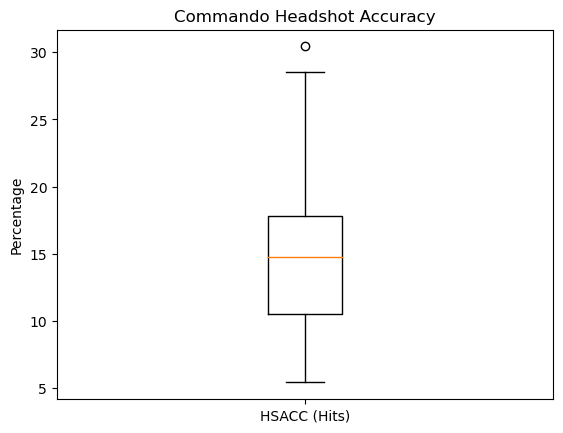

In [23]:
fig2, ax2 = plt.subplots()

mando_hsacc_plot = ax2.boxplot(x=mando_acc_df['HSACC (Shots)'], positions = [1])

ax2.set_title('Commando Headshot Accuracy')
ax2.set_ylabel('Percentage')

plt.xticks([1], ['HSACC (Hits)'])

In [24]:
print("Headshot Accuracy Plot Statistics:")
print(f"  Lower Quartile (Q1): {mando_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Median (Q2): {mando_hsacc_plot['medians'][0].get_ydata()[1]}")
print(f"  Upper Quartile (Q3): {mando_hsacc_plot['boxes'][0].get_ydata()[3]}")
print(f"  Interquartile Range (IQR): {mando_hsacc_plot['boxes'][0].get_ydata()[3] - mando_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Lower Whisker: {mando_hsacc_plot['whiskers'][0].get_ydata()[1]}")
print(f"  Upper Whisker: {mando_hsacc_plot['whiskers'][1].get_ydata()[1]}")
print(f"  Outliers: {mando_hsacc_plot['fliers'][0].get_ydata()}")
print("")

mando_hsacc = mando_hsacc_plot['whiskers'][1].get_ydata()[1]/100

Headshot Accuracy Plot Statistics:
  Lower Quartile (Q1): 10.48850575
  Median (Q2): 14.75155279
  Upper Quartile (Q3): 17.82
  Interquartile Range (IQR): 7.33149425
  Lower Whisker: 5.41186393
  Upper Whisker: 28.52893456
  Outliers: [30.43478261]



This time, I'm going to use the upper whisker value of **28.52%**. The Commando is incentivized to hit body shots for reliability, which is outside the scope of this model. In addition, the model breaks later on if the mando accuracy is too low due to the way I've had to ignore certain mechanical interactions.

### 6c. Zed Head Health Pool, Wave 1

This is how much collective **Adjusted Head HP** is present for each zed in a given wave. As a reminder, the **Adjusted Head HP** is the zed's head health divided by the hitzone multiplier for its head.

The file imported here, the "ZedStats_HPMatrix," is just the Adjusted Head HP of every zed repeated 10 times for easy use in dataframe calculations.

In [25]:
ZedStats_HPMatrix = pd.read_csv('E:\College\FinalProjectData\ZedStats_HPMatrix.csv')
HP_Matrix_df = pd.DataFrame(data=ZedStats_HPMatrix)
HP_Matrix_df.head(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,18.18,18.18,18.18,113.64,45.45,136.36,18.18,18.18,81.99,219.78,140.91,1440,1116.36,1560
1,18.18,18.18,18.18,113.64,45.45,136.36,18.18,18.18,81.99,219.78,140.91,1440,1116.36,1560


In [26]:
# mb_v0a, all waves
mb0a_by_zed = HP_Matrix_df * mb0a_df

mb0a_by_zed.head(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,472.68,472.68,472.68,2272.80,1272.6,2727.20,509.04,472.68,1147.86,2197.80,1972.74,5760,0.0,3120
1,399.96,436.32,436.32,1590.96,1454.4,3272.64,545.40,509.04,1311.84,3076.92,2254.56,23040,0.0,21840


In [27]:
# mb_v0a, wave 1
mb0a_1_by_zed = mb0a_by_zed.iloc[0]
mb0a_wave1_pool=mb0a_1_by_zed.sum()

mb0a_wave1_pool

22870.760000000002

#### 6c. Conclusion
MB_v0a's wave 1 has about **22,871** adjusted Zed head HP

### 6d. *Zed Head Health Pool* for NVM_v1

This pool represents the upper bounds of where I'm going push the model. Once players have the firepower needed to clear this, they're fine.

In [28]:
# nvm_v1, all waves
nvm1_by_zed = HP_Matrix_df * nvm1_df

nvm1_by_zed.tail(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
8,0.0,327.24,236.34,4886.52,590.85,4636.24,509.04,363.60,2705.67,11208.78,5495.49,110880,0.0,65520
9,0.0,218.16,109.08,5454.72,818.10,4772.60,163.62,218.16,3279.60,12967.02,5777.31,120960,0.0,73320


In [29]:
# nvm_v1, wave 10
nvm1_10_by_zed = nvm1_by_zed.iloc[9]
# nvm1_10_by_zed

In [30]:
nvm1_10_pool = nvm1_10_by_zed.sum()
nvm1_10_pool

228058.37

#### 6d. Conclusion
NVM_v1's wave 10 has a monumental **228,058.37** points of adjusted Zed head HP

### 6e. Maximum Team Damage with Wave 1 Loadouts

In [31]:
# Setting up weapon damage variables
nine_cmd_dmg = int(weapons_df['Total Damage'][0])
ar15_hpr_dmg = int(weapons_df['Total Damage'][1])
bullpup_hpr_dmg = int(weapons_df['Total Damage'][2])
bullpup_cmd_dmg = int(weapons_df['Total Damage'][3])
scar_cmd_dmg = int(weapons_df['Total Damage'][4])
fnfal_cmd_dmg = int(weapons_df['Total Damage'][5])
nine_ss_dmg = int(weapons_df['Total Damage'][6])
winch_ss_dmg = int(weapons_df['Total Damage'][7])
ebr_ss_dmg = int(weapons_df['Total Damage'][8])
ebr1_ss_dmg = int(weapons_df['Total Damage'][9])
spx_ss_dmg = int(weapons_df['Total Damage'][10])
spx1_ss_dmg = int(weapons_df['Total Damage'][11])
spx2_ss_dmg = int(weapons_df['Total Damage'][12])
nine_gs_dmg = int(weapons_df['Total Damage'][13])
spx_gs_dmg = int(weapons_df['Total Damage'][14])
spx1_gs_dmg = int(weapons_df['Total Damage'][15])
spx2_gs_dmg = int(weapons_df['Total Damage'][16])
revol_gs_dmg = int(weapons_df['Total Damage'][17])
deag_gs_dmg = int(weapons_df['Total Damage'][18])
ebr1_ss_dmg

189

In [32]:
# REFERENCE LIST TO COPY AROUND
# nine_cmd_dmg = int(weapons_df['Total Damage'][0])
# ar15_hpr_dmg = int(weapons_df['Total Damage'][1])
# bullpup_hpr_dmg = int(weapons_df['Total Damage'][2])
# bullpup_cmd_dmg = int(weapons_df['Total Damage'][3])
# scar_cmd_dmg = int(weapons_df['Total Damage'][4])
# fnfal_cmd_dmg = int(weapons_df['Total Damage'][5])
# nine_ss_dmg = int(weapons_df['Total Damage'][6])
# winch_ss_dmg = int(weapons_df['Total Damage'][7])
# ebr_ss_dmg = int(weapons_df['Total Damage'][8])
# ebr1_ss_dmg = int(weapons_df['Total Damage'][9])
# spx_ss_dmg = int(weapons_df['Total Damage'][10])
# spx1_ss_dmg = int(weapons_df['Total Damage'][11])
# spx2_ss_dmg = int(weapons_df['Total Damage'][12])
# nine_gs_dmg = int(weapons_df['Total Damage'][13])
# spx_gs_dmg = int(weapons_df['Total Damage'][14])
# spx1_gs_dmg = int(weapons_df['Total Damage'][15])
# spx2_gs_dmg = int(weapons_df['Total Damage'][16])
# revol_gs_dmg = int(weapons_df['Total Damage'][17])
# deag_gs_dmg = int(weapons_df['Total Damage'][18])

Perks will spawn in with the following ammunition loads:

#### Commando

- 9mm (mando), 90 rounds
- AR15 HPR, 308 rounds

#### Gunslinger 1

- 9mm (slinger), 90 rounds
- Dual 1858, 156 rounds

#### Gunslinger 2

- 9mm (slinger), 90 rounds
- Dual 1858, 156 rounds

#### Sharpshooter 1

- 9mm (sharp), 109 rounds
- Winchester, 117 rounds

#### Sharpshooter 2

- 9mm (sharp), 109 rounds
- Winchester, 117 rounds

The following code calculates the max damage of each player's loadout and stores those values in an array. 

In [33]:
team_w1_ammo = [90,308,90,156,90,156,109,117,109,117]

In [34]:
# Initialize the array for collecting together the team's damage & another array for keeping things straight
team_w1_full = np.empty(shape=(0))
team_w1_full_labels = np.empty(shape=(0))
team_w1_full_perShot = np.empty(shape=(0))

In [35]:
# Commando, Wave 1
cmd_w1 = []
cmd_w1.append(nine_cmd_dmg*team_w1_ammo[0]) 
cmd_w1.append(ar15_hpr_dmg*team_w1_ammo[1])

team_w1_full = np.append(team_w1_full,cmd_w1)

#Assorted arrays that will help us remember and use all these values later
team_w1_full_labels = np.append(team_w1_full_labels,'mando 9mm')
team_w1_full_labels = np.append(team_w1_full_labels,'mando ar15hpr')
team_w1_full_perShot = np.append(team_w1_full_perShot,nine_cmd_dmg)
team_w1_full_perShot = np.append(team_w1_full_perShot,ar15_hpr_dmg)
# team_w1_full

In [36]:
# Gunslinger 1, Wave 1
gs1_w1 = []
gs1_w1.append(nine_gs_dmg*team_w1_ammo[2]) 
gs1_w1.append(revol_gs_dmg*team_w1_ammo[3])

team_w1_full = np.append(team_w1_full,gs1_w1)

#Assorted arrays that will help us remember and use all these values later
team_w1_full_labels = np.append(team_w1_full_labels,'gs1 9mm')
team_w1_full_labels = np.append(team_w1_full_labels,'gs1 1858s')
team_w1_full_perShot = np.append(team_w1_full_perShot,nine_gs_dmg)
team_w1_full_perShot = np.append(team_w1_full_perShot,revol_gs_dmg)
# team_w1_full

In [37]:
# Gunslinger 2, Wave 1
gs2_w1 = []
gs2_w1.append(nine_gs_dmg*team_w1_ammo[4]) 
gs2_w1.append(revol_gs_dmg*team_w1_ammo[5])

team_w1_full = np.append(team_w1_full,gs2_w1)

#Assorted arrays that will help us remember and use all these values later
team_w1_full_labels = np.append(team_w1_full_labels,'gs2 9mm')
team_w1_full_labels = np.append(team_w1_full_labels,'gs2 1858s')
team_w1_full_perShot = np.append(team_w1_full_perShot,nine_gs_dmg)
team_w1_full_perShot = np.append(team_w1_full_perShot,revol_gs_dmg)
# team_w1_full

In [38]:
# Sharpshooter 1, Wave 1
ss1_w1 = []
ss1_w1.append(nine_ss_dmg*team_w1_ammo[6]) 
ss1_w1.append(winch_ss_dmg*team_w1_ammo[7])

team_w1_full = np.append(team_w1_full,ss1_w1)

#Assorted arrays that will help us remember and use all these values later
team_w1_full_labels = np.append(team_w1_full_labels,'ss1 9mm')
team_w1_full_labels = np.append(team_w1_full_labels,'ss1 winch')
team_w1_full_perShot = np.append(team_w1_full_perShot,nine_ss_dmg)
team_w1_full_perShot = np.append(team_w1_full_perShot,winch_ss_dmg)
# team_w1_full

In [39]:
# Sharpshooter 2, Wave 1
ss2_w1 = []
ss2_w1.append(nine_ss_dmg*team_w1_ammo[8]) 
ss2_w1.append(winch_ss_dmg*team_w1_ammo[9])

team_w1_full = np.append(team_w1_full,ss2_w1)

#Assorted arrays that will help us remember and use all these values later
team_w1_full_labels = np.append(team_w1_full_labels,'ss2 9mm')
team_w1_full_labels = np.append(team_w1_full_labels,'ss2 winch')
team_w1_full_perShot = np.append(team_w1_full_perShot,nine_ss_dmg)
team_w1_full_perShot = np.append(team_w1_full_perShot,winch_ss_dmg)
# team_w1_full

In [40]:
team_w1_full

array([ 4230., 14476.,  3960., 13728.,  3960., 13728.,  5668., 19188.,
        5668., 19188.])

In [41]:
team_w1_full_labels

array(['mando 9mm', 'mando ar15hpr', 'gs1 9mm', 'gs1 1858s', 'gs2 9mm',
       'gs2 1858s', 'ss1 9mm', 'ss1 winch', 'ss2 9mm', 'ss2 winch'],
      dtype='<U32')

In [42]:
team_w1_full_df = pd.DataFrame([team_w1_full],columns=team_w1_full_labels)
team_w1_full_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,4230.0,14476.0,3960.0,13728.0,3960.0,13728.0,5668.0,19188.0,5668.0,19188.0


In [43]:
# Total Team Damage
Max_Team_Damage_w1 = sum(team_w1_full)
Max_Team_Damage_w1

103794.0

In [44]:
team_w1_full_perc = team_w1_full/Max_Team_Damage_w1
team_w1_full_perc

array([0.0407538 , 0.13946856, 0.03815249, 0.13226198, 0.03815249,
       0.13226198, 0.05460817, 0.18486618, 0.05460817, 0.18486618])

#### 6e. Conclusion
Through this process, we discover our team, if they had 100% accuracy at all times and the zeds didn't resist any damage, could deal an impressive **103,794** points of damage.

However, players are not perfect aim bots, and even if they were, the zeds have resistances to player weapons.

### 6g. Max Team Damage after HSACC in Wave 1

Now, we apply the headshot accuracies we found waaaaay back in 6a and 6b.
We found dps_hsacc to be **51.025%** and mando_hsacc to be **17.82%**. Now, we need to modify our damage totals appropriately so we know how many shots players are actually going to land.

HOWEVER: The **17.82%** does commando players a *grave* disservice in the first wave. They, too, are on semi-automatic weapons, firing at the same sorts of targets as the DPS players. So, for the first wave, and the ***first wave only***, our commando will use the DPS players' accuracies.

At the end, we will also create an array with the percentage of the team's total damage that each weapon represents. This will be used to weight the ammunition expenditure from each weapon.

This first table is the total theoretical damage for each weapon.

In [45]:
team_w1_full_df = pd.DataFrame([team_w1_full],columns=team_w1_full_labels)
team_w1_full_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,4230.0,14476.0,3960.0,13728.0,3960.0,13728.0,5668.0,19188.0,5668.0,19188.0


Now, we change multiply those values by our 51.025% headshot accuracy

In [46]:
team_w1_hsacc = np.copy(team_w1_full)
team_w1_hsacc*=dps_hsacc
team_w1_hsacc_df = pd.DataFrame([team_w1_hsacc],columns=team_w1_full_labels)
team_w1_hsacc_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,2158.3575,7386.379,2020.59,7004.712,2020.59,7004.712,2892.097,9790.677,2892.097,9790.677


Next, we find the total.

In [47]:
Max_Team_Damage_w1_HSACC = sum(team_w1_hsacc)
Max_Team_Damage_w1_HSACC

52960.8885

We close out with some percentages to use later. These are identical to the percentages of total possible damage this wave, since we assigned our commando the same accuracy as the DPS players, but that will change in later waves.

In [48]:
# Percent of overall damage dealt by each weapon
team_w1_hsacc_perc = team_w1_hsacc / sum(team_w1_hsacc)
team_w1_hsacc_perc_df = pd.DataFrame([team_w1_hsacc_perc],columns=team_w1_full_labels)
team_w1_hsacc_perc_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,0.040754,0.139469,0.038152,0.132262,0.038152,0.132262,0.054608,0.184866,0.054608,0.184866


#### 6f. Max Team Damage after HSACC Conclusion

Now, we find that our team is still on track to an impressive **52,961** points of damage once accuracies are accounted for. In addition, we have percentages of that total that each weapon is expected to do.

However, our work is not done.

### 6g. Max Team Damage after Weapon Resistances in Wave 1
Weapon math in KF2 comes with the fun and exciting added complication of enemy damage resistances. This is where things can get really weird.

The following is a sample of the assorted damage resistances this model has to deal with.

In [49]:
weapons_resist_df.head(5)

,9mm (mando),AR15 HPR,Bullpup HPR,Bullpup,SCAR,FN FAL,9mm (sharp),Winchester,EBR,EBR+1,SPX (sharp),SPX+1 (sharp),SPX+2 (sharp),9mm (slinger),SPX (slinger),SPX+1 (slinger),SPX+2 (slinger),1858 (single),Deagle (single)
Weapon,,,,,,,,,,,,,,,,,,,
Cyst,1.01,1.5,1.5,1.5,1.5,1.00,1.01,1.00,1.00,1.00,1.00,1.00,1.00,1.01,1.00,1.00,1.00,1.01,1.01
Alpha Clot,1.01,1.0,1.0,1.0,1.0,1.00,1.01,1.00,1.00,1.00,1.00,1.00,1.00,1.01,1.00,1.00,1.00,1.01,1.01
Slasher,1.01,1.0,1.0,1.0,1.0,1.00,1.01,1.00,1.00,1.00,1.00,1.00,1.00,1.01,1.00,1.00,1.00,1.01,1.01
Rioter,1.01,1.0,1.0,1.0,1.0,1.00,1.01,1.00,1.00,1.00,1.00,1.00,1.00,1.01,1.00,1.00,1.00,1.01,1.01
Gorefast,1.00,1.2,1.2,1.2,1.2,1.25,1.00,1.25,1.25,1.25,1.25,1.25,1.25,1.00,1.25,1.25,1.25,1.00,1.00


When one of these values is greater than 1, the weapon is receiving a bonus. When one of these values is less than 1, the weapon is losing damage. Put simply, these are multipliers.

So, we know the number of each zed type in the wave.

In [50]:
mb0a_df.head(1)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,26,26,26,20,28,20,28,26,14,10,14,4,0,2


We know the Adjusted Head HP of each zed in the wave, so we don't have to worry about hitzones:

In [51]:
HP_Matrix_df.head(1)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,18.18,18.18,18.18,113.64,45.45,136.36,18.18,18.18,81.99,219.78,140.91,1440,1116.36,1560


Thus, we know the total adjusted head HP of each zed type in the wave.

In [52]:
mb0a_by_zed.head(1)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,472.68,472.68,472.68,2272.8,1272.6,2727.2,509.04,472.68,1147.86,2197.8,1972.74,5760,0.0,3120


We also know the percentage of damage each weapon is expected to do in the wave after accuracy is accounted for.

In [53]:
team_w1_hsacc_perc_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,0.040754,0.139469,0.038152,0.132262,0.038152,0.132262,0.054608,0.184866,0.054608,0.184866


To examine a specific case, we know that the commando's 9mm is expected to do about 4.08% of the damage in the wave, and that it has different resistances against different zeds.

We know that it does, for instance, 1% higher damage to cysts.

Proceeding forward with some math, the 9mm's damage is only increased a slight bit against cysts, from 47 to 47.47 because of the 1% damage bonus (47*1.01). 

The cysts have 472.68 HP collectively. Of that 472.68, 4.08% is expected to be done by this 9mm, or about 19.28 points of damage (472.68*0.0408). That is about 0.4 rounds of 9mm. However, a bullet cannot do 40% of its damage.

Against a fleshpound, the 9mm loses 25% of its damage, dealing 35.25 damage per shot.

The fleshpounds have 3,120 HP, collectively.

Of that 3,120 damage, the 9mm is expected to do 4.08%, or about 127.296, which at 35.25 damage per shot is 3.6 shots. Again, a bullet cannot do 40% of its damage.

So, we need to find relevant multiples. We'll be doing this by dividing and rounding up. It's not a perfect solution--the perfect solution would be modeling all of the interactions shot by shot--but it's good enough for these purposes.

First, the total adjusted Zed HP in w1

In [54]:
sum(mb0a_by_zed.iloc[0])

22870.760000000002

Next, the total HP of each individual zed type in w1

In [55]:
mb0a_by_zed.iloc[0]

Cyst             472.68
Alpha Clot       472.68
Slasher          472.68
Rioter          2272.80
Gorefast        1272.60
Gorefiend       2727.20
Crawler          509.04
Stalker          472.68
Bloat           1147.86
Husk            2197.80
Siren           1972.74
Scrake          5760.00
Quarterpound       0.00
Fleshpound      3120.00
Name: 0, dtype: float64

Next, the percentage of damage that the commando 9mm is expected to deal

In [56]:
team_w1_hsacc_perc[0]

0.040753800797733976

The product of those

In [57]:
mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0]

Cyst             19.263507
Alpha Clot       19.263507
Slasher          19.263507
Rioter           92.625238
Gorefast         51.863287
Gorefiend       111.143766
Crawler          20.745315
Stalker          19.263507
Bloat            46.779658
Husk             89.568703
Siren            80.396653
Scrake          234.741893
Quarterpound      0.000000
Fleshpound      127.151858
Name: 0, dtype: float64

Finally, the damage to each of the preceding zed types dealt by the commando's 9mm

In [58]:
weapons_zedDmg_df["9mm (mando)"].values

array([47.47, 47.47, 47.47, 47.47, 47.  , 47.  , 47.  , 47.  , 30.55,
       47.  , 47.  , 37.6 , 35.25, 35.25])

This allows us to get the number of rounds required to deal the budgeted damage to each enemy type.
For multiple enemies, like the cysts and crawlers, it's impossible to deal less damage than a single shot, so I've enforced a floor of one round to meet those requirements.

In [59]:
np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values)

array([1.        , 1.        , 1.        , 1.95123738, 1.10347419,
       2.36476097, 1.        , 1.        , 1.53124903, 1.90571709,
       1.71056708, 6.24313544, 0.        , 3.60714492])

Finally, we sum the prior table to find out how many 9mm round the commando needs to land as headshots to fulfill their part of the damage budget, and we discover that the commando needs to hit with their 9mm 29 times to deal their portion of the damage.

In [60]:
np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values)

array([1.        , 1.        , 1.        , 1.95123738, 1.10347419,
       2.36476097, 1.        , 1.        , 1.53124903, 1.90571709,
       1.71056708, 6.24313544, 0.        , 3.60714492])

Doing this with all of the w1 weapons, we get the following:

In [129]:
w1_rounds = []
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0] / weapons_zedDmg_df["9mm (mando)"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[1] / weapons_zedDmg_df["AR15 HPR"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[1] / weapons_zedDmg_df["AR15 HPR"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[1] / weapons_zedDmg_df["AR15 HPR"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[2] / weapons_zedDmg_df["9mm (slinger)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[2] / weapons_zedDmg_df["9mm (slinger)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[2] / weapons_zedDmg_df["9mm (slinger)"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[3] / weapons_zedDmg_df["1858"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[3] / weapons_zedDmg_df["1858"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[3] /weapons_zedDmg_df["1858"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[4] / weapons_zedDmg_df["9mm (slinger)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[4] / weapons_zedDmg_df["9mm (slinger)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[4] / weapons_zedDmg_df["9mm (slinger)"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[5] / weapons_zedDmg_df["1858"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[5] / weapons_zedDmg_df["1858"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[5] / weapons_zedDmg_df["1858"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[6] / weapons_zedDmg_df["9mm (sharp)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[6] / weapons_zedDmg_df["9mm (sharp)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[6] / weapons_zedDmg_df["9mm (sharp)"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[7] / weapons_zedDmg_df["Winchester"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[7] / weapons_zedDmg_df["Winchester"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[7] / weapons_zedDmg_df["Winchester"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[8] / weapons_zedDmg_df["9mm (sharp)"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[8] / weapons_zedDmg_df["9mm (sharp)"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[8] / weapons_zedDmg_df["9mm (sharp)"].values)))
w1_rounds.append(sum(np.where(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[9] / weapons_zedDmg_df["Winchester"].values< 1, np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[9] / weapons_zedDmg_df["Winchester"].values), mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[9] / weapons_zedDmg_df["Winchester"].values)))


In [130]:
w1_rounds[0]

25.41728610720975

We process all of that out to generate the following table:

In [131]:
w1_rounds_df = pd.DataFrame([w1_rounds],columns=team_w1_full_labels)
w1_rounds_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,25.417286,82.459436,25.417286,40.389963,25.417286,40.389963,29.727602,31.810887,29.727602,31.810887


In addition, these rounds are not being fired with perfect accuracy, as established above. So, we divide by our accuracy value to get back to the number of shots fired to land those hits.

In [65]:
w1_rounds_used = round(w1_rounds_df.iloc[0]/.51025,0)
w1_rounds_used_df = pd.DataFrame([w1_rounds_used],columns=team_w1_full_labels)
w1_rounds_used_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,50.0,162.0,50.0,79.0,50.0,79.0,58.0,62.0,58.0,62.0


In [66]:
w1_rounds_used_df["mando 9mm"]

0    50.0
Name: mando 9mm, dtype: float64

Before we move on, we have a few more things we need to address. First and foremost is double-checking how much damage the weapons are dealing without overkill. The commando 9mm as an example:

In [67]:
mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0]

Cyst             19.263507
Alpha Clot       19.263507
Slasher          19.263507
Rioter           92.625238
Gorefast         51.863287
Gorefiend       111.143766
Crawler          20.745315
Stalker          19.263507
Bloat            46.779658
Husk             89.568703
Siren            80.396653
Scrake          234.741893
Quarterpound      0.000000
Fleshpound      127.151858
Name: 0, dtype: float64

In [68]:
sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0])

932.0703971327823

In [69]:
w1_res_dmg = []

In [70]:
w1_rounds = []
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[1]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[2]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[3]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[4]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[5]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[6]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[7]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[8]))
w1_res_dmg.append(sum(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[9]))

In [71]:
for item in w1_res_dmg:
    print(item)

932.0703971327823
3189.752025743299
872.5765419966472
3024.932012255044
872.5765419966472
3024.932012255044
1248.930262635605
4228.029971674663
1248.930262635605
4228.029971674663


In [72]:
sum(w1_res_dmg)

22870.76

**22,870.76** matches the damage on the wave, so we haven't gone awry somewhere.

In [73]:
w1_res_dmg_over  = []
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[0]/weapons_zedDmg_df["9mm (mando)"].values)*weapons_zedDmg_df["9mm (mando)"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[1]/weapons_zedDmg_df["AR15 HPR"].values)*weapons_zedDmg_df["AR15 HPR"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[2]/weapons_zedDmg_df["9mm (slinger)"].values)*weapons_zedDmg_df["9mm (slinger)"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[3]/weapons_zedDmg_df["1858"].values)*weapons_zedDmg_df["1858"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[4]/weapons_zedDmg_df["9mm (slinger)"].values)*weapons_zedDmg_df["9mm (slinger)"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[5]/weapons_zedDmg_df["1858"].values)*weapons_zedDmg_df["1858"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[6]/weapons_zedDmg_df["9mm (sharp)"].values)*weapons_zedDmg_df["9mm (sharp)"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[7]/weapons_zedDmg_df["Winchester"].values)*weapons_zedDmg_df["Winchester"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[8]/weapons_zedDmg_df["9mm (sharp)"].values)*weapons_zedDmg_df["9mm (sharp)"].values))
w1_res_dmg_over.append(sum(np.ceil(mb0a_by_zed.iloc[0]*team_w1_hsacc_perc[9]/weapons_zedDmg_df["Winchester"].values)*weapons_zedDmg_df["Winchester"].values))

In [74]:
sum(w1_res_dmg_over)

27564.160000000003

In [75]:
Max_Team_Damage_w1_RES = int(sum(w1_res_dmg_over))
Max_Team_Damage_w1_RES

27564

#### 6g. Max Team Damage after Weapon Resistances Conclusion
We now know that, with our accuracies and the resistances of the zeds, we can expect that if all of the team's necessary damage was being dealt to zeds, they would do **27,564** damage. As it is, the minimum amount to deal is much closer to the wave total of **22,871**

### 6h. The Story So Far
So, we've done a ton of math and I would not blame anyone for getting lost, so it's time for some visuals! The following bar plot displays, from left to right:
1. NVM_v1's wave 10 adjusted zed head HP pool. 
 - *nvm1_10_pool*
2. The team's total possible damage if they were perfectly accurate and zeds resisted no damage.. 
 - *Max_Team_Damage_w1*
3. The team's expected damage output after accuracy is accounted for. 
 - *Max_Team_Damage_w1_HSACC*
4. The team's total possible damage after accuracy and zed resistances are applied. 
 - *Max_Team_Damage_w1_RES*
5. MB_v0a's wave 1 adjusted zed head HP pool, 
 - *mb0a_wave1_pool*

In [76]:
bar_labels_6h = ['NVM_v1 w10','Team Max','HSACC Max','Resisted Max','MB_v0a w1']

In [77]:
bar_6h_values = [nvm1_10_pool,Max_Team_Damage_w1,Max_Team_Damage_w1_HSACC,Max_Team_Damage_w1_RES,mb0a_wave1_pool]

[Text(0, 0, '228058.37'),
 Text(0, 0, '103794.00'),
 Text(0, 0, '52960.89'),
 Text(0, 0, '27564.00'),
 Text(0, 0, '22870.76')]

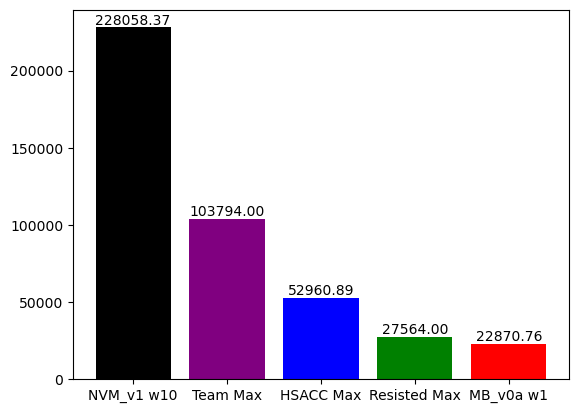

In [78]:
fig3, ax3 = plt.subplots()
bars = ax3.bar(bar_labels_6h,bar_6h_values,color=['black','purple','blue','green','red'])
ax3.bar_label(bars, fmt='%.2f', label_type='edge')

#### 6h. The Story So Far Conclusion
So, we can see that we have enough damage to complete the first wave of mb_v0a available to the team after accuracies and resistances are accounted for. In fact, if players play ideally, there's a lot of wiggle room, with more than 25,000 damage between the ammunition that players *need* and the ammunition they're anticipated to hit. There's a lot more room for wave 1 to grow.

In addition, none of our damage budgets are anywhere near the NVM_v1 wave 10 cutoff. So, the greater model will continue in the future.

### 6i. Using the Ammunition - Wave 1
Now, we know how much damage the team is expected to deal, and roughly how much is expected to come from each of their weapons. Now, it's time to figure out how  many rounds we used and what we have left to us.

Now, returning the team's original ammunition load, we have the following:

In [79]:
team_w1_ammo_df = pd.DataFrame([team_w1_ammo],columns=team_w1_full_labels)
team_w1_ammo_df

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,90,308,90,156,90,156,109,117,109,117


In [80]:
# w1_rounds_used_df

In [81]:
team_w1_ammo_df = pd.concat([team_w1_ammo_df, w1_rounds_used_df.iloc[[0]]], ignore_index=True)
diff_row1 = -team_w1_ammo_df.diff().iloc[1]
diff_df1 = pd.DataFrame([diff_row1], columns=team_w1_ammo_df.columns)
team_w1_ammo_use = pd.concat([team_w1_ammo_df,diff_row1.to_frame().transpose()], ignore_index=True)
team_w1_ammo_use

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,90.0,308.0,90.0,156.0,90.0,156.0,109.0,117.0,109.0,117.0
1,50.0,162.0,50.0,79.0,50.0,79.0,58.0,62.0,58.0,62.0
2,40.0,146.0,40.0,77.0,40.0,77.0,51.0,55.0,51.0,55.0


### 6j. Getting Paid
Okay, great, we know how many bullets we used, but we still don't know how much money we have to spend. Time for more math, because nothing can be simple in this game.

1. Calculate Adjusted Dosh value = Base Dosh Reward x Dosh Kill modifier x (Amount of the players / Wave Length modifier) x Game Length Dosh Scale modifier. Outcome is a FLOAT variable.

    I needn't detain you with what all that is or the linear interpolation nonsense that goes into the Wave Length modifier. The values come out to:
    Step1 = Reward * 0.7 * (12/5.769230769230769) * .8
    

2. Calculate Score Denominator value = Adjusted Dosh / Total Damage Taken By ZED. Outcome is a FLOAT variable.

    Step2 = Step1 / ZedHP
    

3. Calculate player's dosh cut that depends from % of inflicted damage: Earned Dosh = Round (Damage Inflicted By Player x Score Denominator).

    Step3 = (PlayerDamage*Step2)
    

4. If player has assisted in ZED kill but did not kill it themself, calculate Assistance Dosh value = Round (Earned Dosh x Perk Assist Dosh Modifer). Relevant for Sharpshooter which is the only perk in game that gets 10% more dosh (x1.1 multiplier) for assists.

    Step4=(Step3 * Modifier)


I've made a few assumptions here, to save my ailing brain and this sprawling analysis: 
1. Zeds that generally die after their head health is depleted have their full body health applied to the bonuses.
2. For those that don't, mainly bloats and fleshpounds, I guesstimated roughly where their health bar is after the decapitation bonus is applied with most weapons.
3. A more thorough version of this inquiry would look at the primary weapons employed in each wave and the decapitation bonus they cause to a given enemy type, how commonly that enemy type is shot by that perk and weapon, and weight the bonuses accordingly. A full computational model would be able to model on a shot by shot and player by player level. I'm content with these guesstimates.
4. For now, I'm assuming every zed is fully killed by an individual player. 

The values come out to the bottom row of the following table

In [82]:
zedstats_df_display.iloc[3:8]

,Category,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
3,Dosh reward,7.000000,7.000000,7.000000,7.000000,12.000000,12.000000,10.000000,15.00000,17.000000,17.000000,25.000000,75.000000,75.000000,200.000000
4,Dosh HP,100.000000,100.000000,100.000000,300.000000,200.000000,200.000000,55.000000,75.00000,257.000000,600.000000,230.000000,3569.000000,1724.000000,4608.000000
5,Dosh Step1,8.153600,8.153600,8.153600,8.153600,13.977600,13.977600,11.648000,17.47200,19.801600,19.801600,29.120000,87.360000,87.360000,232.960000
6,Dosh Step2,0.081536,0.081536,0.081536,0.027179,0.069888,0.069888,0.211782,0.23296,0.077049,0.033003,0.126609,0.024477,0.050673,0.050556
7,Dosh Step3,8.000000,8.000000,8.000000,8.000000,14.000000,14.000000,12.000000,17.00000,20.000000,20.000000,29.000000,87.000000,87.000000,233.000000


In [83]:
team_w1_ammo_use

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,90.0,308.0,90.0,156.0,90.0,156.0,109.0,117.0,109.0,117.0
1,50.0,162.0,50.0,79.0,50.0,79.0,58.0,62.0,58.0,62.0
2,40.0,146.0,40.0,77.0,40.0,77.0,51.0,55.0,51.0,55.0


In [84]:
dosh_per_zed = zedstats_df_clean.iloc[7].to_numpy()
dosh_per_zed

array([  8.,   8.,   8.,   8.,  14.,  14.,  12.,  17.,  20.,  20.,  29.,
        87.,  87., 233.])

In [85]:
dosh_per_zed_w1 = mb0a_df.iloc[0]*dosh_per_zed
team_dosh_w1 = sum(dosh_per_zed_w1)
team_dosh_w1

3934.0

In [86]:
med_eco_df.iloc[0]

Wave 1     459
Wave 2     635
Wave 3    1034
Wave 4    1047
Wave 5    1108
Name: 0, dtype: int64

In [87]:
med_dosh_w1 = med_eco_df['Wave 1'][0]
med_dosh_w1

459

The medic will earn 459, and the reast of the team will earn 3,934 dosh. 

Then, the team gets bonus dosh. This is equal to the total dosh, and is split evenly among the six players.

For the model, I am going to weight the money earned by the team by the anticipated damage percentage of each player

In [88]:
team_w1_hsacc_perc

array([0.0407538 , 0.13946856, 0.03815249, 0.13226198, 0.03815249,
       0.13226198, 0.05460817, 0.18486618, 0.05460817, 0.18486618])

In [89]:
dosh_split_w1_perc = np.sum(team_w1_hsacc_perc.reshape(-1,2), axis=1)
dosh_split_w1_perc

array([0.18022236, 0.17041447, 0.17041447, 0.23947434, 0.23947434])

In [90]:
dosh_split_w1 = np.round(dosh_split_w1_perc*team_dosh_w1)
dosh_split_w1

array([709., 670., 670., 942., 942.])

In [91]:
sum(dosh_split_w1)-team_dosh_w1

-1.0

There's no dosh left over, and the -1 represents an acceptable rounding error.

In [92]:
dosh_split_w1

array([709., 670., 670., 942., 942.])

In [93]:
dosh_split_w1 = np.concatenate((dosh_split_w1, [med_dosh_w1]))
dosh_split_w1

array([709., 670., 670., 942., 942., 459.])

In [94]:
w1_bonus = round(sum(dosh_split_w1)/6,0)
w1_bonus

732.0

In [95]:
dosh_split_w1 = dosh_split_w1 + w1_bonus
dosh_split_w1

array([1441., 1402., 1402., 1674., 1674., 1191.])

In [96]:
dosh_split_w1_labels = ['mando','gs1','gs2','ss1','ss2','medic']
dosh_split_w1_df = pd.DataFrame([dosh_split_w1],columns=dosh_split_w1_labels)
dosh_split_w1_df

,mando,gs1,gs2,ss1,ss2,medic
0,1441.0,1402.0,1402.0,1674.0,1674.0,1191.0


In [97]:
team_w1_ammo_use

,mando 9mm,mando ar15hpr,gs1 9mm,gs1 1858s,gs2 9mm,gs2 1858s,ss1 9mm,ss1 winch,ss2 9mm,ss2 winch
0,90.0,308.0,90.0,156.0,90.0,156.0,109.0,117.0,109.0,117.0
1,50.0,162.0,50.0,79.0,50.0,79.0,58.0,62.0,58.0,62.0
2,40.0,146.0,40.0,77.0,40.0,77.0,51.0,55.0,51.0,55.0


### 6k. Spending the money
Now that we know how much money each player has and how much they need, we can spend the money.

In [98]:
trader1_csv = pd.read_csv('E:\College\FinalProjectData\Trader1.csv')

trader1_df = pd.DataFrame(data=trader1_csv)
trader1_df

,Unnamed: 0,mando budget,mando 9mm,mando ar15hpr,mando bullpup,mando nade,Sell/Donate,Cost,gs1 budget,gs1 9mm,...,ss2 winch,ss2 ebr1,ss2 freeze,Sell/Donate.4,Cost.4,Medic Budget,Medic 201,Medic nade,Sell/Donate.5,Cost.5
0,Ammo Cost,NaN,0.8,1.0,0.9375,40.0,NaN,NaN,NaN,0.8,...,2.6667,2.65,40.0,NaN,NaN,NaN,NaN,40.0,NaN,NaN
1,Starting Ammo,NaN,90.0,308.0,NaN,NaN,NaN,NaN,NaN,90.0,...,117.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Spent Ammo,NaN,79.0,268.0,NaN,NaN,NaN,NaN,NaN,79.0,...,102.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Remaining Ammo,NaN,11.0,40.0,NaN,NaN,NaN,NaN,NaN,11.0,...,15.0000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trader 1,1484.0,NaN,NaN,90.0000,0.0,0.0,650.0,1366.0,0.0,...,0.0000,60.00,NaN,NaN,1100.0,1191.0,650.0,NaN,NaN,650.0
5,3985,834.0,0.0,0.0,264.0000,0.0,0.0,247.5,716.0,0.0,...,0.0000,110.00,NaN,NaN,291.5,541.0,0.0,0.0,0.0,0.0
6,2604.5,586.5,0.0,120.0,0.0000,0.0,0.0,120.0,441.0,0.0,...,0.0000,0.00,0.0,0.0,0.0,541.0,0.0,0.0,0.0,0.0
7,2444.5,466.5,0.0,0.0,0.0000,0.0,0.0,0.0,541.0,0.0,...,0.0000,0.00,0.0,0.0,0.0,541.0,0.0,0.0,0.0,0.0
8,2044.5,466.5,0.0,0.0,0.0000,0.0,0.0,0.0,341.0,0.0,...,0.0000,0.00,0.0,0.0,0.0,541.0,0.0,0.0,40.0,40.0
9,2044.5,466.5,0.0,0.0,0.0000,0.0,466.5,466.5,0.0,0.0,...,0.0000,0.00,0.0,-466.5,-466.5,501.0,0.0,0.0,0.0,0.0


There's a ton of math here that's hard to present and various players were trading money about, but the things to understand are as follows:
- Commando bought a bullpup and filled it
- Commando bought 120 rounds of AR15 to go to 160 rounds
- Commando bought 2 grenades

- Slinger 1 bought an SPX and filled it
- Slinger 1 sold their starting dual 1858s
- Slinger 1 bought a new set of dual 1858s to be at full ammunition

- Slinger 2 bought an SPX and filled it
- Slinger 2 sold their starting dual 1858s
- Slinger 2 bought a new set of dual 1858s to be at full ammunition

- Sharp 1 bought an EBR, filled it, and upgraded it to +1
- Sharp 1 bought 5 grenades

- Sharp 2 bought an EBR, filled it, and upgraded it to +1
- Sharp 2 bought 6 grenades

## 7. The Wave 2 Analysis
This is where the inquiry leaves off for now. I intend to return to this project in the future, hopefully in a way where I don't have to go on an emergency reprogramming spree at the last minute after finding bad logic. More code exists beyond this point, but it's not doing anything useful.

### 7a. Zed Head Health Pool - Wave 2

A new wave means a new pool of enemies. We're going to continue using mb_v0a for now to see how well it adheres to its design goal of pushing the team economy.

In [99]:
mb0a_w2_labels = mb0a_df.columns.values
mb0a_w2_labels

array(['Cyst', 'Alpha Clot', 'Slasher', 'Rioter', 'Gorefast', 'Gorefiend',
       'Crawler', 'Stalker', 'Bloat', 'Husk', 'Siren', 'Scrake',
       'Quarterpound', 'Fleshpound'], dtype=object)

In [100]:
mb0a_w2_zeds = mb0a_df.iloc[1].values
mb0a_w2_zeds_df = pd.DataFrame([mb0a_w2_zeds],columns=mb0a_w2_labels)
mb0a_w2_zeds_df

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,22,24,24,14,32,24,30,28,16,14,16,16,0,14


In [101]:
mb0a_w2_by_zed = mb0a_by_zed.iloc[1].values
mb0a_w2_by_zed

array([  399.96,   436.32,   436.32,  1590.96,  1454.4 ,  3272.64,
         545.4 ,   509.04,  1311.84,  3076.92,  2254.56, 23040.  ,
           0.  , 21840.  ])

In [102]:
mb0a_w2_by_zed_df = pd.DataFrame([mb0a_w2_by_zed],columns=mb0a_w2_labels)
mb0a_w2_by_zed_df

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,399.96,436.32,436.32,1590.96,1454.4,3272.64,545.4,509.04,1311.84,3076.92,2254.56,23040.0,0.0,21840.0


In [103]:
# mb_v0a, wave 2
mb0a_wave2_pool=mb0a_w2_by_zed.sum()

mb0a_wave2_pool

60168.36

#### 7a. Zed Head Health Pool Conclusion
We can see that wave 2 is an extremely significant increase in lethality and Zed HP. Wave 1 had 22870.76 zed head HP. Wave 2 has nearly tripled that, to **60,168.36** head HP.

### 7b. Team Loadouts - Wave 2
The players have new loadouts going into this wave. They are as follows:

In [104]:
team_w2_full_labels = ['mando 9mm','mando ar15 hpr','mando bullpup hpr','gs1 9mm','gs1 1858s','gs1 SPX','gs2 9mm','gs2 1858s','gs2 SPX', 'ss1 9mm','ss1 winch','ss1 ebr1','ss2 9mm','ss2 winch','ss2 ebr1',]
team_w2_full_labels

['mando 9mm',
 'mando ar15 hpr',
 'mando bullpup hpr',
 'gs1 9mm',
 'gs1 1858s',
 'gs1 SPX',
 'gs2 9mm',
 'gs2 1858s',
 'gs2 SPX',
 'ss1 9mm',
 'ss1 winch',
 'ss1 ebr1',
 'ss2 9mm',
 'ss2 winch',
 'ss2 ebr1']

In [105]:
team_w2_ammo = [11,160,354,11,156,80,11,156,80,14,15,170,14,15,170]
team_w2_ammo_df = pd.DataFrame([team_w2_ammo],columns=team_w2_full_labels)
team_w2_ammo_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,11,160,354,11,156,80,11,156,80,14,15,170,14,15,170


In [106]:
team_w2_full = np.empty(shape=(0))
team_w2_full_perShot = np.empty(shape=(0))

In [107]:
# Commando, Wave 2
cmd_w2 = []
cmd_w2.append(nine_cmd_dmg*team_w2_ammo[0]) 
cmd_w2.append(ar15_hpr_dmg*team_w2_ammo[1])
cmd_w2.append(bullpup_hpr_dmg*team_w2_ammo[2])

team_w2_full = np.append(team_w2_full,cmd_w2)

# team_w2_full

In [108]:
# Gunslinger 1, Wave 2
gs1_w2 = []
gs1_w2.append(nine_gs_dmg*team_w2_ammo[3]) 
gs1_w2.append(revol_gs_dmg*team_w2_ammo[4])
gs1_w2.append(spx_gs_dmg*team_w2_ammo[5])

team_w2_full = np.append(team_w2_full,gs1_w2)

# team_w2_full

In [109]:
# Gunslinger 2, Wave 2
gs2_w2 = []
gs2_w2.append(nine_gs_dmg*team_w2_ammo[6]) 
gs2_w2.append(revol_gs_dmg*team_w2_ammo[7])
gs2_w2.append(spx_gs_dmg*team_w2_ammo[8])

team_w2_full = np.append(team_w2_full,gs2_w2)

# team_w2_full

In [110]:
# Sharpshooter 1, Wave 2
ss1_w2 = []
ss1_w2.append(nine_ss_dmg*team_w2_ammo[9]) 
ss1_w2.append(winch_ss_dmg*team_w2_ammo[10])
ss1_w2.append(ebr1_ss_dmg*team_w2_ammo[11])

team_w2_full = np.append(team_w2_full,ss1_w2)

# team_w2_full

In [111]:
# Sharpshooter 2, Wave 2
ss2_w2 = []
ss2_w2.append(nine_ss_dmg*team_w2_ammo[9]) 
ss2_w2.append(winch_ss_dmg*team_w2_ammo[10])
ss2_w2.append(ebr1_ss_dmg*team_w2_ammo[11])

team_w2_full = np.append(team_w2_full,ss2_w2)

# team_w2_full

In [112]:
team_w2_full_df = pd.DataFrame([team_w2_full],columns=team_w2_full_labels)
team_w2_full_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,517.0,7520.0,17700.0,484.0,13728.0,23120.0,484.0,13728.0,23120.0,728.0,2460.0,32130.0,728.0,2460.0,32130.0


In [113]:
# Total Team Damage
Max_Team_Damage_w2 = sum(team_w2_full)
Max_Team_Damage_w2

171037.0

#### 7b. Team Loadouts Conclusion
We can see that the team's capacity to deal with enemies has nearly doubled to **171,037** points of damage, were there to be no resistances and 100% headshot accuracy.

### 7c. Max Wave 2 Team Damage after HSACC

Now, we apply the headshot accuracies we found waaaaay back in 6a and 6b.
We found dps_hsacc to be **51.025%** and mando_hsacc to be **28.52%**. Now, we need to modify our damage totals appropriately so we know how many shots players are actually going to land.

For this wave, we will now be using the 17.82% commando accuracy, now that they have a primary automatic weapon.

At the end, we will also create an array with the percentage of the team's total damage that each weapon represents. This will be used to weight the ammunition expenditure from each weapon.

First, we look at our full damage values found in 7b:

In [114]:
team_w2_full_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,517.0,7520.0,17700.0,484.0,13728.0,23120.0,484.0,13728.0,23120.0,728.0,2460.0,32130.0,728.0,2460.0,32130.0


Then, we apply our accuracies:

In [115]:
team_w2_hsacc = np.copy(team_w2_full)
team_w2_hsacc[:3] *= mando_hsacc
team_w2_hsacc[3:] *= dps_hsacc
team_w2_hsacc_df = pd.DataFrame([team_w2_hsacc],columns=team_w2_full_labels)
team_w2_hsacc_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,147.494592,2145.375879,5049.621417,246.961,7004.712,11796.98,246.961,7004.712,11796.98,371.462,1255.215,16394.3325,371.462,1255.215,16394.3325


In [116]:
Max_Team_Damage_w2_HSACC = sum(team_w2_hsacc)
Max_Team_Damage_w2_HSACC

81481.8168877072

This is disturbingly close to our wave HP total already.

We close out with some percentages to use later. These are identical to the percentages of total possible damage this wave, since we assigned our commando the same accuracy as the DPS players, but that will change in later waves.

In [117]:
# Percent of overall damage dealt by each weapon
team_w2_hsacc_perc = team_w2_hsacc / sum(team_w2_hsacc)
team_w2_hsacc_perc_df = pd.DataFrame([team_w2_hsacc_perc],columns=team_w2_full_labels)
team_w2_hsacc_perc_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,0.00181,0.02633,0.061972,0.003031,0.085967,0.144781,0.003031,0.085967,0.144781,0.004559,0.015405,0.201202,0.004559,0.015405,0.201202


#### 7c. Max Wave 2 Team Damage after HSACC Conclusion

Now, we find that our team is expected to be an alarmingly low **81,482** points of damage once accuracies are accounted for. In addition, we have percentages of that total that each weapon is expected to do.

However, our work is not done.

### 7d. Max Team Damage after Weapon Resistances in Wave 2
Weapon math in KF2 comes with the fun and exciting added complication of enemy damage resistances. This is where things can get really weird.

In [119]:
mb0a_w2_by_zed_df = pd.DataFrame([mb0a_w2_by_zed],columns=mb0a_w2_labels)
mb0a_w2_by_zed_df

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,399.96,436.32,436.32,1590.96,1454.4,3272.64,545.4,509.04,1311.84,3076.92,2254.56,23040.0,0.0,21840.0


In [120]:
team_w2_full_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,517.0,7520.0,17700.0,484.0,13728.0,23120.0,484.0,13728.0,23120.0,728.0,2460.0,32130.0,728.0,2460.0,32130.0


In [121]:
sum(mb0a_w2_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[0])

2.5825951290524425

In [122]:
# Declaring our array for this set of calculations
team_w2_res = []

In [123]:
# Resisted damage = sum(mb0a_v1 wave2 / zedstats resistance row * percent of damage weapon it is expected to do)

# 9mm
team_w2_res.append(sum(mb0a_w2_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[0]))
team_w2_res

[2.5825951290524425]

#### 7d. Max Team Damage after Weapon Resistances in Wave 2 Conclusion
We now know that, with our accuracies and the resistances of the zeds, we can expect our team to do about **72,283** points of damage to the zeds

### 7e. The Story So Far - Wave 2
So, we've done a ton more math and I would not blame anyone for getting lost, so it's time for the return of the visuals! The following bar plot displays, from left to right:
1. NVM_v1's wave 10 adjusted zed head HP pool. 
 - *nvm1_10_pool*
2. The team's total possible damage for wave 2 if they were perfectly accurate and zeds resisted no damage.. 
 - *Max_Team_Damage_w2*
3. The team's expected damage output after accuracy is accounted for. 
 - *Max_Team_Damage_w2_HSACC*
4. The team's total possible damage after accuracy and zed resistances are applied. 
 - *Max_Team_Damage_w2_RES*
5. MB_v0a's wave 1 adjusted zed head HP pool, 
 - *mb0a_wave2_pool*

In [124]:
bar_labels_7e = ['NVM_v1 w10','Team Max2','HSACC Max2','Resist Max2','MB_v0a w2']
bar_7e_values = [nvm1_10_pool,Max_Team_Damage_w2,Max_Team_Damage_w2_HSACC,Max_Team_Damage_w2_RES,mb0a_wave2_pool]

fig4, ax4 = plt.subplots()
bars = ax4.bar(bar_labels_7e,bar_7e_values,color=['black','purple','blue','green','red'])
ax4.bar_label(bars, fmt='%.2f', label_type='edge')

NameError: name 'Max_Team_Damage_w2_RES' is not defined

In [ ]:
Max_Team_Damage_w2_RES - mb0a_wave2_pool

#### 7e. The Story So Far - Wave 2 Conclusion
So, we can see that we have enough damage to complete the next wave of mb_v0a available to the team after accuracies and resistances are accounted for (green bar), but none of our damage budgets are anywhere near the NVM_v1 wave 10 cutoff. So, the model continues.

The data so far also speaks to the importance of medics and synergystic play. The team is only just *barely* clearing these waves, with little room to spare. Had there been joint takedowns on wave 1 and medic buffs in the mix, the margin would be larger.

### 7f. What's Next?

I could call this good enough and move on, but I really want to push the limit. There's still **12,114** damage remaining in the guns. Let's empty them all out by swapping cysts for larges.

Adding 4 fleshpounds and 4 scrakes accounts for just about all of that, leaving only a roughly **180** point damage margin. The medic had better be on their A-game with buffs and maybe even some damage!

## 8. The Analysis - Wave 2b

### 8a. Zed Head Health Pool - Wave 2b

We have to reconstitute the pool of enemies a little, but there's not too much work to do.

We get the existing MB wave 2 values.

In [133]:
mb0a_w2_zeds = mb0a_df.iloc[1].values
mb0a_w2_zeds

array([22, 24, 24, 14, 32, 24, 30, 28, 16, 14, 16, 16,  0, 14],
      dtype=int64)

Now, we change them. We're losing 8 cysts, the first slot, and gaining 4 scrakes and 4 fleshpounds to create wave 2b

In [134]:
mb0a_w2b_zeds = [14, 24, 24, 14, 32, 24, 30, 28, 16, 14, 16, 20,  0, 18]
mb0a_w2b_zeds_df = pd.DataFrame([mb0a_w2b_zeds],columns=mb0a_w2_labels)
mb0a_w2b_zeds_df

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,14,24,24,14,32,24,30,28,16,14,16,20,0,18


In [135]:
mb0a_w2b_by_zed = mb0a_w2b_zeds * HP_Matrix_df.iloc[0]
# mb0a_w2b_by_zed
mb0a_w2b_by_zed_df = pd.DataFrame([mb0a_w2b_by_zed],columns=mb0a_w2_labels)
mb0a_w2b_by_zed_df

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,254.52,436.32,436.32,1590.96,1454.4,3272.64,545.4,509.04,1311.84,3076.92,2254.56,28800.0,0.0,28080.0


In [136]:
# mb_v0a, wave 2b
mb0a_w2b_pool=mb0a_w2b_by_zed.sum()

mb0a_w2b_pool

72022.92

#### 8a. Zed Head Health Pool Conclusion - Wave 2b
We can see that wave 2 is an extremely significant increase in lethality and Zed HP. Wave 1 had 22870.76 zed head HP, and now wave 2b has more than tripled that to **72,023**. It a ridiculous number this early.

### 8b. Team Loadouts - Wave 2b
Very little to do here. Teams have the same eco as our first run at this wave, so I'm just restating values for reference here.

In [137]:
Max_Team_Damage_w2

171037.0

As before, the max damage the team can output before accuracy resistances are applied is **171,037**.

### 8c. Max Team Damage after HSACC - Wave 2b

Again, just restating some important values and percentages. Nothing about our accuracies is expected to change.

In [138]:
# Percent of overall damage expected to be dealt by each weapon
team_w2_hsacc_perc_df

,mando 9mm,mando ar15 hpr,mando bullpup hpr,gs1 9mm,gs1 1858s,gs1 SPX,gs2 9mm,gs2 1858s,gs2 SPX,ss1 9mm,ss1 winch,ss1 ebr1,ss2 9mm,ss2 winch,ss2 ebr1
0,0.00181,0.02633,0.061972,0.003031,0.085967,0.144781,0.003031,0.085967,0.144781,0.004559,0.015405,0.201202,0.004559,0.015405,0.201202


In [139]:
# Maximum damage before zed resistances are applied
Max_Team_Damage_w2_HSACC

81481.8168877072

Our max damage before resistances is **81,482**.

### 8d. Max Team Damage after Weapon Resistances - Wave 2b
Time to calculate resistances.

In [140]:
mb0a_w2b_by_zed_df

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,254.52,436.32,436.32,1590.96,1454.4,3272.64,545.4,509.04,1311.84,3076.92,2254.56,28800.0,0.0,28080.0


In [141]:
# team_w2_full_df

In [142]:
# Declaring our array for this set of calculations
team_w2b_res = []
# 9mm
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[0]))
team_w2b_res

[2.7180091105893434]

In [143]:
# AR15 hpr
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[3]*team_w2_hsacc_perc[1]))
#bullpup
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[4]*team_w2_hsacc_perc[2]))
#gs1 9mm
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[3]))
#gs1 1858s
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[8]*team_w2_hsacc_perc[4]))
#gs1 SPX
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[5]*team_w2_hsacc_perc[5]))
#gs2 9mm
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[6]))
#gs2 1858s
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[8]*team_w2_hsacc_perc[7]))
#gs2 SPX
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[5]*team_w2_hsacc_perc[8]))
#ss1 9mm
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[9]))
#ss1 winch
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[5]*team_w2_hsacc_perc[10]))
#ss1 ebr
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[5]*team_w2_hsacc_perc[11]))
#ss2 9mm
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[7]*team_w2_hsacc_perc[9]))
#ss2 winch
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[5]*team_w2_hsacc_perc[10]))
#ss2 ebr
team_w2b_res.append(sum(mb0a_w2b_by_zed/zedstats_df_clean.iloc[5]*team_w2_hsacc_perc[11]))

# Make sure we didn't forget anything
team_w2b_res_df = pd.DataFrame([team_w2b_res],columns=team_w2_full_labels)
team_w2b_res_df

IndexError: single positional indexer is out-of-bounds

In [ ]:
team_w2b_res_perc = np.copy(team_w2b_res)
team_w2b_res_perc = team_w2b_res_perc/sum(team_w2b_res)
team_w2b_res_perc_df = pd.DataFrame([team_w2b_res_perc],columns=team_w2_full_labels)
team_w2b_res_perc_df

In [144]:
# Quick sanity check
sum(team_w2b_res_perc)

NameError: name 'team_w2b_res_perc' is not defined

In [145]:
Max_Team_Damage_w2b_RES = sum(team_w2b_res)
Max_Team_Damage_w2b_RES

58.81939630378899

#### 7d. Max Team Damage after Weapon Resistances in Wave 2 Conclusion
We now know that, with our accuracies and the resistances of the zeds, we can expect our team to do about **72,283** points of damage to the zeds. That just *barely* clears the necessary value.

### 8e. The Story So Far - Wave 2b
We've found an outer edge, and it's time to see the fruits of our labors. The following bar plot displays, from left to right:
1. NVM_v1's wave 10 adjusted zed head HP pool. 
 - *nvm1_10_pool*
2. The team's total possible damage for wave 2 if they were perfectly accurate and zeds resisted no damage.. 
 - *Max_Team_Damage_w2*
3. The team's expected damage output after accuracy is accounted for. 
 - *Max_Team_Damage_w2_HSACC*
4. The team's total possible damage after accuracy and zed resistances are applied. 
 - *Max_Team_Damage_w2_RES*
5. MB_v0a's wave 1 adjusted zed head HP pool, 
 - *mb0a_wave2_pool*

In [146]:
Max_Team_Damage_w2b_RES

58.81939630378899

[Text(0, 0, '228058.37'),
 Text(0, 0, '171037.00'),
 Text(0, 0, '81481.82'),
 Text(0, 0, '58.82'),
 Text(0, 0, '60168.36')]

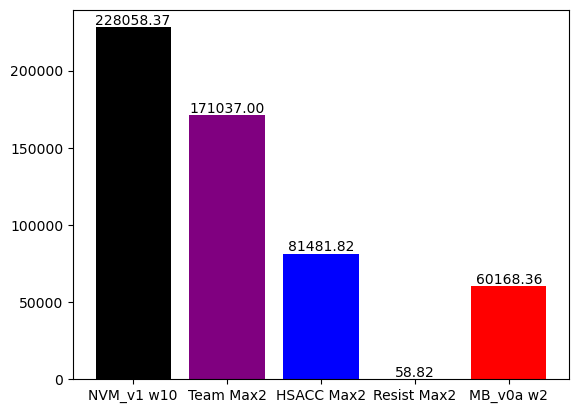

In [147]:
bar_labels_8e = ['NVM_v1 w10','Team Max2','HSACC Max2','Resist Max2','MB_v0a w2']
bar_8e_values = [nvm1_10_pool,Max_Team_Damage_w2,Max_Team_Damage_w2_HSACC,Max_Team_Damage_w2b_RES,mb0a_wave2_pool]

fig5, ax5 = plt.subplots()
bars = ax5.bar(bar_labels_8e,bar_8e_values,color=['black','purple','blue','green','red'])
ax5.bar_label(bars, fmt='%.2f', label_type='edge')

24.	Repeat with next wave
25.	_**LINE PLOT**_ of team money per wave.
26.	Conglomerate _**LINE PLOT**_ of team money per wave for different cycles.
27.	When _Expected Team Damage Pool_ is greater than _NVM_v1 w10 Adjusted Head Health Pool_, cut the model off. Players, if they play well, can deal with basically any number of zeds in waves after this point. It is the "Git Gud" Threshold.